d:\Deep learning\myenv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
d:\Deep learning\myenv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
d:\Deep learning\myenv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violations in the nex

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 14s 1us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.8271 - loss: 0.5422 - val_accuracy: 0.9762 - val_loss: 0.0762
Epoch 2/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9329 - loss: 0.2184 - val_accuracy: 0.9792 - val_loss: 0.0660
Epoch 3/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9480 - loss: 0.1697 - val_accuracy: 0.9838 - val_loss: 0.0550
Epoch 4/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9581 - loss: 0.1381 - val_accuracy: 0.9863 - val_loss: 0.0436
Epoch 5/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9620 - loss: 0.1264 - val_accuracy: 0.9880 - val_loss: 0.0447
Epoch 6/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9665 - loss: 0.1131 - val_accuracy: 0.9885 - val_loss: 0.0379
Epoch 7/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9686 - loss: 0.1053 - val_accuracy: 0.9885 - val_loss: 0.0397
Epoch 8/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9707 - loss: 0.0967 - val_accu

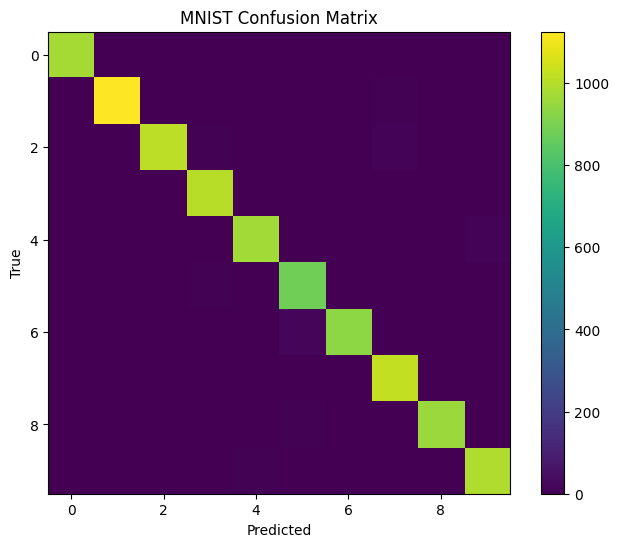

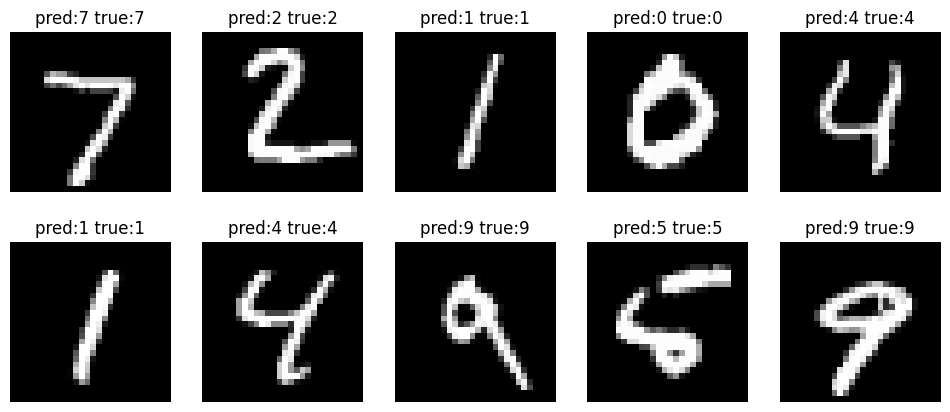

In [1]:
# === MNIST - Keras example ===
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns  # optional for nicer cm plot (install if wanted)

# 1) Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2) Preprocess
# Normalize to [0,1] and add channel axis
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0
x_train = np.expand_dims(x_train, -1)  # shape (N,28,28,1)
x_test  = np.expand_dims(x_test, -1)

# 3) Simple data augmentation (optional)
data_augment = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomTranslation(0.05, 0.05),
])

# 4) Build CNN model
def build_mnist_cnn():
    model = models.Sequential([
        layers.Input(shape=(28,28,1)),
        data_augment,  # comment out if you don't want augmentation
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(10, activation='softmax'),
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_mnist_cnn()
model.summary()

# 5) Train
history = model.fit(x_train, y_train,
                    validation_split=0.1,
                    epochs=8,
                    batch_size=128)

# 6) Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# 7) Confusion matrix and classification report
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.title("MNIST Confusion Matrix")
plt.imshow(cm, interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted'); plt.ylabel('True')
plt.show()

# 8) Save model
model.save('mnist_cnn.h5')

# 9) Inference helper for new images (PIL)
from PIL import Image

def predict_digit_from_pil(img_pil, model_path='mnist_cnn.h5'):
    # img_pil: PIL Image (any size) — will be converted/scaled
    img = img_pil.convert('L').resize((28,28))
    arr = np.array(img).astype('float32') / 255.0
    arr = np.expand_dims(arr, axis=(0,-1))  # shape (1,28,28,1)
    model = tf.keras.models.load_model(model_path)
    pred = model.predict(arr)
    return np.argmax(pred), pred.max()

# Example: visualize few predictions
fig, axes = plt.subplots(2,5, figsize=(12,5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(x_test[i].squeeze(), cmap='gray')
    ax.set_title(f"pred:{y_pred[i]} true:{y_test[i]}")
    ax.axis('off')


Device: cpu
Epoch 1/8 - train_acc:0.7845 val_acc:0.9078
Epoch 2/8 - train_acc:0.8789 val_acc:0.9208
Epoch 3/8 - train_acc:0.8986 val_acc:0.9287
Epoch 4/8 - train_acc:0.9097 val_acc:0.9333
Epoch 5/8 - train_acc:0.9164 val_acc:0.9359
Epoch 6/8 - train_acc:0.9222 val_acc:0.9380
Epoch 7/8 - train_acc:0.9260 val_acc:0.9373
Epoch 8/8 - train_acc:0.9295 val_acc:0.9385
              precision    recall  f1-score   support

           0     0.9368    0.9263    0.9315       800
           1     0.9664    0.9700    0.9682       800
           2     0.9721    0.9587    0.9654       800
           3     0.9481    0.9600    0.9540       800
           4     0.9572    0.9788    0.9679       800
           5     0.9735    0.9625    0.9679       800
           6     0.8623    0.8063    0.8333       800
           7     0.9546    0.9463    0.9504       800
           8     0.7537    0.7725    0.7630       800
           9     0.9617    0.9413    0.9514       800
          10     0.9748    0.9675    0.97

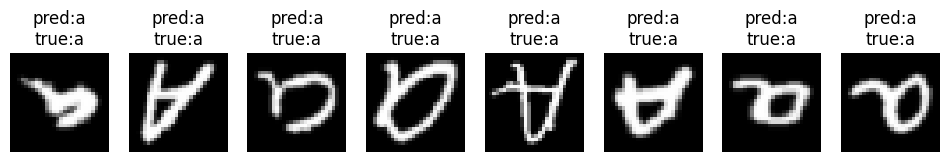

In [5]:
# === EMNIST letters - PyTorch example ===
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from PIL import Image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device:", device)

# 1) Transforms
transform = transforms.Compose([
    transforms.ToTensor(),  # converts to [0,1], shape (C,H,W)
    transforms.Normalize((0.1307,), (0.3081,))  # mnist-like normalization
])

# 2) Load EMNIST letters (will download if necessary)
# root can be './data'
train_dataset = datasets.EMNIST(root='./data', split='letters', train=True, download=True, transform=transform)
test_dataset  = datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=transform)

# Note: labels in this split are 1..26 -> convert by subtracting 1 for classification convenience
class EMNISTWrapper(torch.utils.data.Dataset):
    def __init__(self, ds):
        self.ds = ds
    def __len__(self):
        return len(self.ds)
    def __getitem__(self, idx):
        img, label = self.ds[idx]
        label = label - 1  # now 0..25
        # torchvision EMNIST images may be rotated — fix rotation: transpose and flip
        # Many versions give rotated images, so rotate 90 then flip left-right:
        img = torch.rot90(img, k=1, dims=(1,2))
        img = torch.flip(img, dims=[2])
        return img, label

train_dataset = EMNISTWrapper(train_dataset)
test_dataset  = EMNISTWrapper(test_dataset)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
test_loader  = DataLoader(test_dataset,  batch_size=256, shuffle=False, num_workers=2)

# 3) Define CNN
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=26):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*7*7, 128), nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, num_classes),
        )
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model = SimpleCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

# 4) Train loop
def train_epoch(model, loader, opt, crit):
    model.train()
    total_loss = 0
    correct = 0
    steps = 0
    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)
        opt.zero_grad()
        out = model(imgs)
        loss = crit(out, labels)
        loss.backward()
        opt.step()
        total_loss += loss.item()
        pred = out.argmax(dim=1)
        correct += (pred == labels).sum().item()
        steps += labels.size(0)
    return total_loss / len(loader), correct / steps

def eval_model(model, loader, crit):
    model.eval()
    total_loss = 0
    correct = 0
    steps = 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)
            out = model(imgs)
            loss = crit(out, labels)
            total_loss += loss.item()
            pred = out.argmax(dim=1)
            correct += (pred == labels).sum().item()
            steps += labels.size(0)
            all_preds.append(pred.cpu().numpy())
            all_labels.append(labels.cpu().numpy())
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)
    return total_loss/len(loader), correct/steps, all_preds, all_labels
# ...existing code...
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=0)
test_loader  = DataLoader(test_dataset,  batch_size=256, shuffle=False, num_workers=0)
# ...existing code...

# Run training
epochs = 8
for epoch in range(1, epochs+1):
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion)
    val_loss, val_acc, _, _ = eval_model(model, test_loader, criterion)
    print(f"Epoch {epoch}/{epochs} - train_acc:{train_acc:.4f} val_acc:{val_acc:.4f}")

# 5) Detailed eval - classification report
_, _, preds, labels = eval_model(model, test_loader, criterion)
print(classification_report(labels, preds, digits=4))

# 6) Save model
torch.save(model.state_dict(), 'emnist_letters_cnn.pth')

# 7) Inference helper for new image (PIL)
def predict_emnist_pil(img_pil, model_path='emnist_letters_cnn.pth'):
    # preprocess same as training: grayscale -> tensor -> normalize -> rotate/flip as above
    img = img_pil.convert('L').resize((28,28))
    arr = transforms.ToTensor()(img)
    arr = transforms.Normalize((0.1307,), (0.3081,))(arr)
    # rotate and flip to match training orientation
    arr = torch.rot90(arr, k=1, dims=(1,2))
    arr = torch.flip(arr, dims=[2])
    x = arr.unsqueeze(0).to(device)
    m = SimpleCNN().to(device)
    m.load_state_dict(torch.load(model_path, map_location=device))
    m.eval()
    with torch.no_grad():
        out = m(x)
        pred = int(out.argmax(dim=1).item())
    # map 0..25 -> 'a'..'z'
    char = chr(pred + ord('a'))
    return char

# Example display of some test samples + preds
it = iter(test_loader)
imgs, labels = next(it)
imgs = imgs[:8]
labels = labels[:8]
model.eval()
with torch.no_grad():
    out = model(imgs.to(device))
    preds = out.argmax(dim=1).cpu().numpy()
fig, axs = plt.subplots(1,8, figsize=(12,3))
for i in range(8):
    axs[i].imshow(imgs[i].squeeze().numpy(), cmap='gray')
    axs[i].set_title(f"pred:{chr(preds[i]+97)}\ntrue:{chr(labels[i]+97)}")
    axs[i].axis('off')


In [6]:
from PIL import ImageOps

def preprocess_for_mnist(img_pil):
    # Convert to grayscale, resize, invert if necessary, and normalize
    img = img_pil.convert('L').resize((28,28))
    arr = np.array(img).astype('float32')
    # If background is dark and digit is bright, you might need to invert:
    # arr = 255 - arr
    arr = arr / 255.0
    arr = np.expand_dims(arr, axis=(0,-1))  # (1,28,28,1)
    return arr


In [8]:
def preprocess_for_emnist(img_pil):
    img = img_pil.convert('L').resize((28,28))
    t = transforms.ToTensor()(img)
    t = transforms.Normalize((0.1307,), (0.3081,))(t)
    t = torch.rot90(t, k=1, dims=(1,2))
    t = torch.flip(t, dims=[2])
    return t.unsqueeze(0)  # (1,1,28,28)
